
# Exploratory Data Analysis (EDA) on Titanic Dataset

## Objective
Extract insights using visual and statistical exploration.



In [2]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
%matplotlib inline


In [3]:

# Step 2: Load Dataset
# If using Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:

# Step 3: Data Overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:

# Summary statistics for numerical columns
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:

# Check missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:

# Step 4: Data Cleaning

# Example: Fill missing age values with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill embarked missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop deck column due to too many missing values
df = df.drop(columns=['deck'])

# Verify cleaning
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

sex
male      577
female    314
Name: count, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64


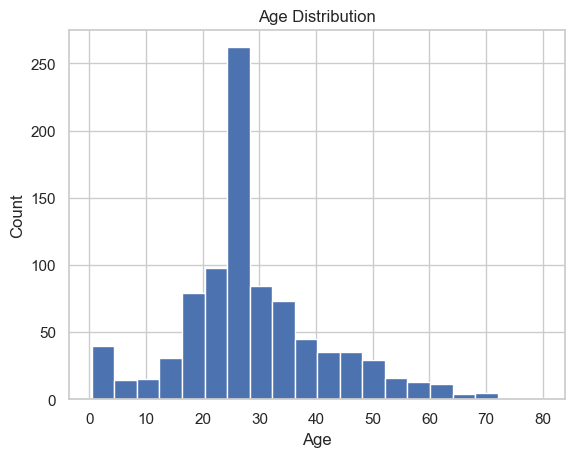

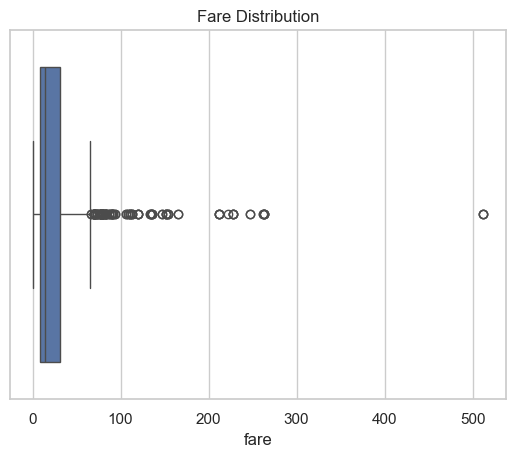

In [8]:

# Step 5: Univariate Analysis

# Categorical counts
print(df['sex'].value_counts())
print(df['class'].value_counts())

# Histograms
df['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Boxplot for fare
sns.boxplot(x=df['fare'])
plt.title("Fare Distribution")
plt.show()


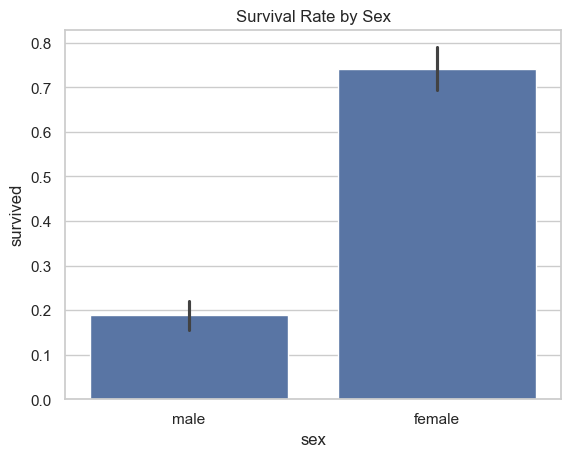

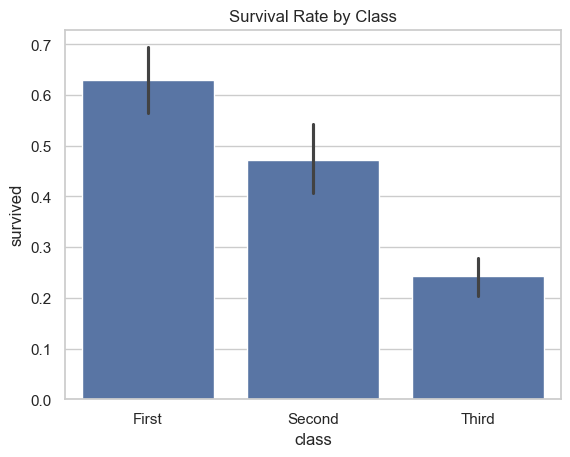

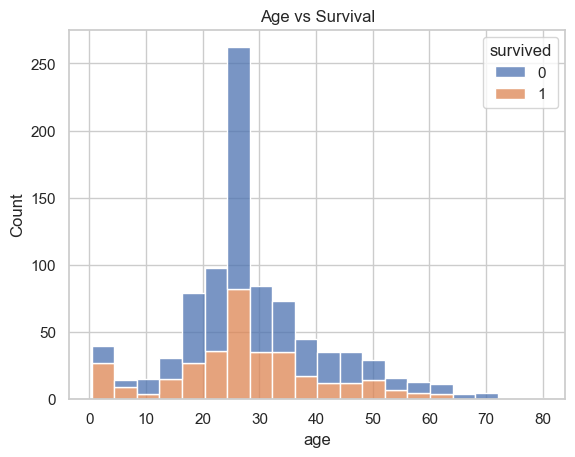

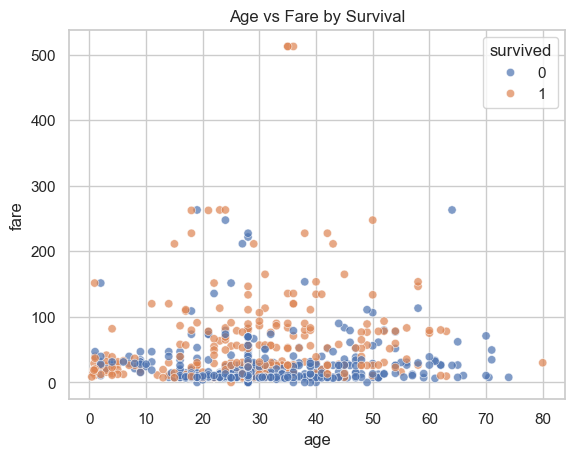

In [22]:

# Step 6: Bivariate Analysis

# Survival rate by sex
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

# Survival rate by class
sns.barplot(x='class', y='survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=20)
plt.title("Age vs Survival")
plt.show()

# Scatterplot: Age vs Fare, colored by Survival
sns.scatterplot(x='age', y='fare', hue='survived', data=df, alpha=0.7)
plt.title("Age vs Fare by Survival")
plt.show()


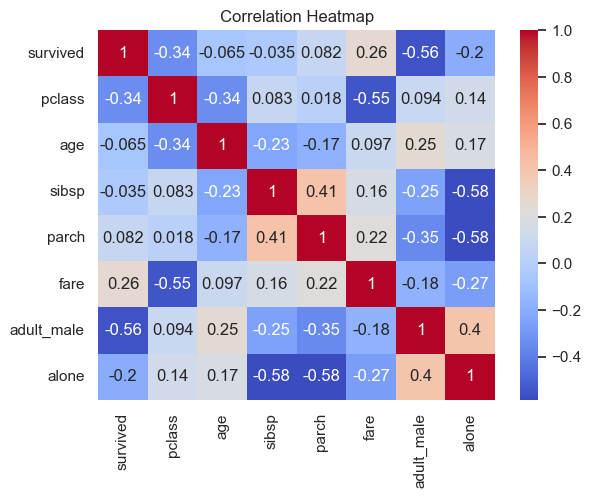

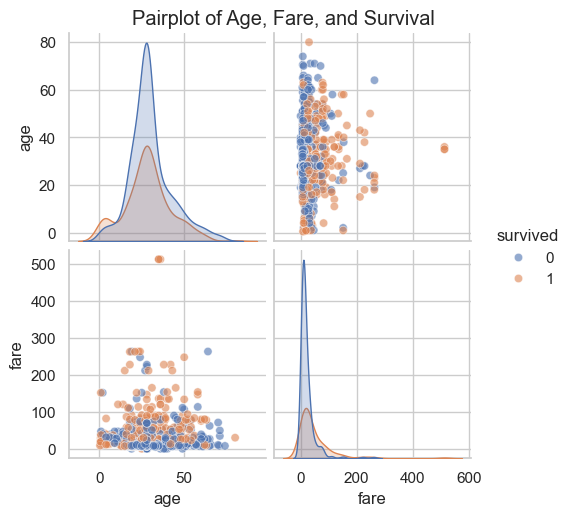

In [24]:

# Step 7: Correlation Analysis
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot: visualize relationships between numeric variables
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Age, Fare, and Survival", y=1.02)
plt.show()




## Observations
- Survival rate is higher among females than males.
- Passengers in 1st class had better survival rates compared to 2nd and 3rd class.
- Younger passengers had a slightly higher chance of survival.
- Higher fares are associated with higher survival probability.

---



## Summary of Findings
1. Gender and passenger class strongly influenced survival.
2. Fare and age showed correlations with survival rates.
3. The majority of passengers in 3rd class did not survive.
4. Females across all classes had better survival chances.

**Outcome:** Learned to identify trends, patterns, and anomalies using EDA.
